In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df= pd.read_csv("E:/Project/Netflix EDA/mymoviedb.csv", lineterminator = '\n')

In [3]:
df.head()

,Release_Date,Title,Overview,Popularity,Vote_Count,Vote_Average,Original_Language,Genre,Poster_Url
0,2021-12-15,Spider-Man: No Way Home,Peter Parker is unmasked and no longer able to...,5083.954,8940,8.3,en,"Action, Adventure, Science Fiction",https://image.tmdb.org/t/p/original/1g0dhYtq4i...
1,2022-03-01,The Batman,"In his second year of fighting crime, Batman u...",3827.658,1151,8.1,en,"Crime, Mystery, Thriller",https://image.tmdb.org/t/p/original/74xTEgt7R3...
2,2022-02-25,No Exit,Stranded at a rest stop in the mountains durin...,2618.087,122,6.3,en,Thriller,https://image.tmdb.org/t/p/original/vDHsLnOWKl...
3,2021-11-24,Encanto,"The tale of an extraordinary family, the Madri...",2402.201,5076,7.7,en,"Animation, Comedy, Family, Fantasy",https://image.tmdb.org/t/p/original/4j0PNHkMr5...
4,2021-12-22,The King's Man,As a collection of history's worst tyrants and...,1895.511,1793,7.0,en,"Action, Adventure, Thriller, War",https://image.tmdb.org/t/p/original/aq4Pwv5Xeu...


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9827 entries, 0 to 9826
Data columns (total 9 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Release_Date       9827 non-null   object 
 1   Title              9827 non-null   object 
 2   Overview           9827 non-null   object 
 3   Popularity         9827 non-null   float64
 4   Vote_Count         9827 non-null   int64  
 5   Vote_Average       9827 non-null   float64
 6   Original_Language  9827 non-null   object 
 7   Genre              9827 non-null   object 
 8   Poster_Url         9827 non-null   object 
dtypes: float64(2), int64(1), object(6)
memory usage: 691.1+ KB


In [5]:
df.duplicated().sum()

np.int64(0)

In [6]:
df.describe()

,Popularity,Vote_Count,Vote_Average
count,9827.000000,9827.000000,9827.000000
mean,40.326088,1392.805536,6.439534
std,108.873998,2611.206907,1.129759
min,13.354000,0.000000,0.000000
25%,16.128500,146.000000,5.900000
50%,21.199000,444.000000,6.500000
75%,35.191500,1376.000000,7.100000
max,5083.954000,31077.000000,10.000000


In [7]:
df['Release_Date'] = pd.to_datetime(df['Release_Date'])
print(df['Release_Date'].dtypes)

datetime64[ns]


In [8]:
df['Release_Date'] = df['Release_Date'].dt.year

In [9]:
df.head()

,Release_Date,Title,Overview,Popularity,Vote_Count,Vote_Average,Original_Language,Genre,Poster_Url
0,2021,Spider-Man: No Way Home,Peter Parker is unmasked and no longer able to...,5083.954,8940,8.3,en,"Action, Adventure, Science Fiction",https://image.tmdb.org/t/p/original/1g0dhYtq4i...
1,2022,The Batman,"In his second year of fighting crime, Batman u...",3827.658,1151,8.1,en,"Crime, Mystery, Thriller",https://image.tmdb.org/t/p/original/74xTEgt7R3...
2,2022,No Exit,Stranded at a rest stop in the mountains durin...,2618.087,122,6.3,en,Thriller,https://image.tmdb.org/t/p/original/vDHsLnOWKl...
3,2021,Encanto,"The tale of an extraordinary family, the Madri...",2402.201,5076,7.7,en,"Animation, Comedy, Family, Fantasy",https://image.tmdb.org/t/p/original/4j0PNHkMr5...
4,2021,The King's Man,As a collection of history's worst tyrants and...,1895.511,1793,7.0,en,"Action, Adventure, Thriller, War",https://image.tmdb.org/t/p/original/aq4Pwv5Xeu...


Dropping the columns

In [10]:
cols= ['Overview', 'Poster_Url']
df.drop(cols, axis= 1, inplace= True)

In [11]:
df.head()

,Release_Date,Title,Popularity,Vote_Count,Vote_Average,Original_Language,Genre
0,2021,Spider-Man: No Way Home,5083.954,8940,8.3,en,"Action, Adventure, Science Fiction"
1,2022,The Batman,3827.658,1151,8.1,en,"Crime, Mystery, Thriller"
2,2022,No Exit,2618.087,122,6.3,en,Thriller
3,2021,Encanto,2402.201,5076,7.7,en,"Animation, Comedy, Family, Fantasy"
4,2021,The King's Man,1895.511,1793,7.0,en,"Action, Adventure, Thriller, War"


In [12]:
# Categorizing Vote_Average column
# Categories: popular, average, below_avg, not_popular

def categorize_col(df, col, labels):
    edges= [df[col].describe()['min'],
            df[col].describe()['25%'],
            df[col].describe()['50%'],
            df[col].describe()['75%'],
            df[col].describe()['max']]
    
    df[col] = pd.cut(df[col], edges , labels = labels, duplicates = 'drop')
    return df

In [13]:
labels = ['not_popular', 'below_avg', 'average', 'popular']

categorize_col(df, 'Vote_Average', labels)
df['Vote_Average'].unique()

['popular', 'below_avg', 'average', 'not_popular', NaN]
Categories (4, object): ['not_popular' < 'below_avg' < 'average' < 'popular']

In [14]:
df.head()

,Release_Date,Title,Popularity,Vote_Count,Vote_Average,Original_Language,Genre
0,2021,Spider-Man: No Way Home,5083.954,8940,popular,en,"Action, Adventure, Science Fiction"
1,2022,The Batman,3827.658,1151,popular,en,"Crime, Mystery, Thriller"
2,2022,No Exit,2618.087,122,below_avg,en,Thriller
3,2021,Encanto,2402.201,5076,popular,en,"Animation, Comedy, Family, Fantasy"
4,2021,The King's Man,1895.511,1793,average,en,"Action, Adventure, Thriller, War"


In [15]:
df['Vote_Average'].value_counts()

Vote_Average
not_popular    2467
popular        2450
average        2412
below_avg      2398
Name: count, dtype: int64

In [16]:
#to remove any Nan value
df.dropna(inplace= True)

df.isna().sum()

Release_Date         0
Title                0
Popularity           0
Vote_Count           0
Vote_Average         0
Original_Language    0
Genre                0
dtype: int64

In [17]:
# split genres
df['Genre'] = df['Genre'].str.split(', ')
df = df.explode('Genre').reset_index(drop = True)
df.head()

,Release_Date,Title,Popularity,Vote_Count,Vote_Average,Original_Language,Genre
0,2021,Spider-Man: No Way Home,5083.954,8940,popular,en,Action
1,2021,Spider-Man: No Way Home,5083.954,8940,popular,en,Adventure
2,2021,Spider-Man: No Way Home,5083.954,8940,popular,en,Science Fiction
3,2022,The Batman,3827.658,1151,popular,en,Crime
4,2022,The Batman,3827.658,1151,popular,en,Mystery


In [18]:
#casting column into category

df['Genre'] = df['Genre'].astype('category')
df['Genre'].dtypes

CategoricalDtype(categories=['Action', 'Adventure', 'Animation', 'Comedy', 'Crime',
                  'Documentary', 'Drama', 'Family', 'Fantasy', 'History',
                  'Horror', 'Music', 'Mystery', 'Romance', 'Science Fiction',
                  'TV Movie', 'Thriller', 'War', 'Western'],
, ordered=False, categories_dtype=object)

In [19]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25552 entries, 0 to 25551
Data columns (total 7 columns):
 #   Column             Non-Null Count  Dtype   
---  ------             --------------  -----   
 0   Release_Date       25552 non-null  int32   
 1   Title              25552 non-null  object  
 2   Popularity         25552 non-null  float64 
 3   Vote_Count         25552 non-null  int64   
 4   Vote_Average       25552 non-null  category
 5   Original_Language  25552 non-null  object  
 6   Genre              25552 non-null  category
dtypes: category(2), float64(1), int32(1), int64(1), object(2)
memory usage: 949.2+ KB


In [20]:
df.nunique()

Release_Date          100
Title                9415
Popularity           8088
Vote_Count           3265
Vote_Average            4
Original_Language      42
Genre                  19
dtype: int64

# Data Visualization

In [21]:
sns.set_style('whitegrid')

1. What is the most frequent genre of movies released on Netflix?

In [22]:
df['Genre'].describe()

count     25552
unique       19
top       Drama
freq       3715
Name: Genre, dtype: object

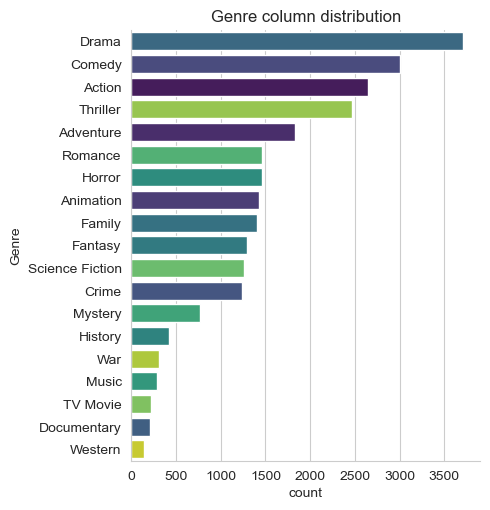

In [23]:
sns.catplot(y= 'Genre', data = df, kind = 'count',
            order = df['Genre'].value_counts().index,
            palette='viridis', hue='Genre', legend=False)
plt.title('Genre column distribution')
plt.show()

2.Which genre has highest votes?

In [24]:
df.head()

,Release_Date,Title,Popularity,Vote_Count,Vote_Average,Original_Language,Genre
0,2021,Spider-Man: No Way Home,5083.954,8940,popular,en,Action
1,2021,Spider-Man: No Way Home,5083.954,8940,popular,en,Adventure
2,2021,Spider-Man: No Way Home,5083.954,8940,popular,en,Science Fiction
3,2022,The Batman,3827.658,1151,popular,en,Crime
4,2022,The Batman,3827.658,1151,popular,en,Mystery


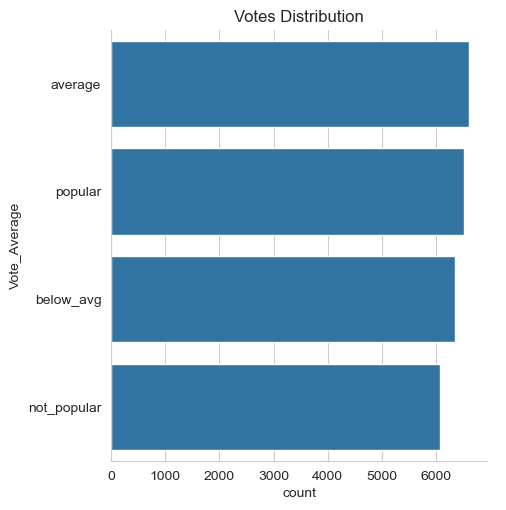

In [25]:
sns.catplot(y = 'Vote_Average', data = df, kind ='count',
            order = df['Vote_Average'].value_counts().index)
plt.title('Votes Distribution')
plt.show()

3. What movie got the highest popularity? What's its genre?

In [26]:
df.head()

,Release_Date,Title,Popularity,Vote_Count,Vote_Average,Original_Language,Genre
0,2021,Spider-Man: No Way Home,5083.954,8940,popular,en,Action
1,2021,Spider-Man: No Way Home,5083.954,8940,popular,en,Adventure
2,2021,Spider-Man: No Way Home,5083.954,8940,popular,en,Science Fiction
3,2022,The Batman,3827.658,1151,popular,en,Crime
4,2022,The Batman,3827.658,1151,popular,en,Mystery


In [27]:
df[df['Popularity'] == df['Popularity'].max()]

,Release_Date,Title,Popularity,Vote_Count,Vote_Average,Original_Language,Genre
0,2021,Spider-Man: No Way Home,5083.954,8940,popular,en,Action
1,2021,Spider-Man: No Way Home,5083.954,8940,popular,en,Adventure
2,2021,Spider-Man: No Way Home,5083.954,8940,popular,en,Science Fiction


4. What movie got the lowest popularity? What's its genre?

In [28]:
df.head()

,Release_Date,Title,Popularity,Vote_Count,Vote_Average,Original_Language,Genre
0,2021,Spider-Man: No Way Home,5083.954,8940,popular,en,Action
1,2021,Spider-Man: No Way Home,5083.954,8940,popular,en,Adventure
2,2021,Spider-Man: No Way Home,5083.954,8940,popular,en,Science Fiction
3,2022,The Batman,3827.658,1151,popular,en,Crime
4,2022,The Batman,3827.658,1151,popular,en,Mystery


In [29]:
df[df['Popularity'] == df['Popularity'].min()]

,Release_Date,Title,Popularity,Vote_Count,Vote_Average,Original_Language,Genre
25546,2021,The United States vs. Billie Holiday,13.354,152,average,en,Music
25547,2021,The United States vs. Billie Holiday,13.354,152,average,en,Drama
25548,2021,The United States vs. Billie Holiday,13.354,152,average,en,History
25549,1984,Threads,13.354,186,popular,en,War
25550,1984,Threads,13.354,186,popular,en,Drama
25551,1984,Threads,13.354,186,popular,en,Science Fiction


5. Which year has the most filmed movies?

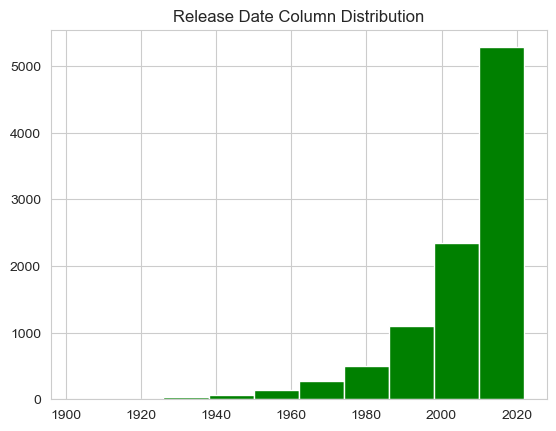

In [30]:
df_unique = df.drop_duplicates(subset=["Title", "Release_Date"])
df_unique["Release_Date"].hist(color='green')
plt.title("Release Date Column Distribution")
plt.show()

# Conclusion
### 1. What is the most frequent genre of movies released on Netflix?
The drama genre is the most frequent in our dataset and has appeared more than 14% of the times among 19 other genres.

### 2. Which genre has the highest votes? 
We have 25.5% of our dataset with popular vote (6520 rows). Drama again gets the highest popularity among fans by having more than 18.5% of movie popularity.

### 3. What movie got the highest popularity? What's its genre?
Spider-Man: No Way Home has the highest popularity rate in our dataset, and it has genres of Action, Adventure and Science Fiction.

### 4. What movie got the lowest popularity? What's its genre?
'The United States', 'Thread' has the lowest rate in our dataset, and it has genres of music, drama, war, sci-fi and history.

### 5. Which year has the most filmed movies?
The year 2020 has the highest filmmaking rate in our dataset.